In [83]:
import pickle
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt

In [105]:
results = {t: [] for t in ["fraziergaussian", "sirsde"]}


for task in results.keys():
    results_dir = f"../results/{task}/"
    for f_name in sorted(os.listdir(results_dir)):
        if ".pickle" in f_name:
            with open(results_dir + f_name, "rb") as f:
                results[task].append(pickle.load(f))

In [122]:
subdfs = []
for t_name, result in results.items():
    print(f"task: {t_name}, num_obs: {len(result)}")
    subdf = pd.DataFrame({
        "none": [r["no_error_model_log_prob_theta_true"] for r in result],
        "spike and slab": [r["error_model_log_prob_theta_true"] for r in result]
    })
    subdf["task"] = t_name
    subdfs.append(subdf)

df = pd.concat(subdfs)
df.head()

task: fraziergaussian, num_obs: 1000
task: sirsde, num_obs: 987


,none,spike and slab,task
0,0.980771,2.088605,fraziergaussian
1,2.369253,0.662023,fraziergaussian
2,-12.934981,1.555709,fraziergaussian
3,2.660821,1.830613,fraziergaussian
4,2.325247,1.630262,fraziergaussian


In [124]:
df_long = df.melt(value_vars=["none", "spike and slab"], id_vars="task", var_name="error model", value_name="log_prob theta*")
df_long.head()

,task,error model,log_prob theta*
0,fraziergaussian,none,0.980771
1,fraziergaussian,none,2.369253
2,fraziergaussian,none,-12.934981
3,fraziergaussian,none,2.660821
4,fraziergaussian,none,2.325247


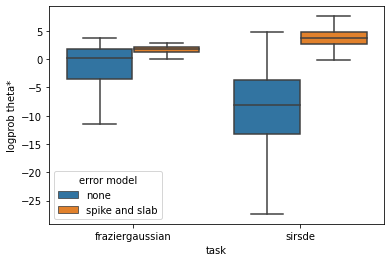

In [127]:
# See nested grouping example in https://seaborn.pydata.org/generated/seaborn.boxplot.html ? if log probs on similar scale
sns.boxplot(
    x = "task",
    y = "log_prob theta*",
    hue = "error model",
    showfliers=False,
    data=df_long)

plt.savefig("../results/plots/log_probthetatrue.png")